In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.express as px

In [5]:
import plotly.graph_objects as go

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\NELSON ESTHER\\AppData\\Local\\Programs\\Microsoft VS Code'

In [8]:
data = pd.read_csv("C:\\Users\\NELSON ESTHER\\Desktop\\project ws\\fitbit smartwatch\\Fitabase Data 4.12.16-5.12.16\\dailyActivity_merged.csv")

In [9]:
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [10]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [12]:
data['ActivityDate']=pd.to_datetime(data['ActivityDate'], format="%m/%d/%Y")
print(data['ActivityDate'].dt.strftime("%m/%d/%Y").sample(5))

576    04/21/2016
819    04/13/2016
29     05/11/2016
575    04/20/2016
128    04/17/2016
Name: ActivityDate, dtype: object


In [13]:
data['TotalMinutes']= data[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum(axis=1)
print(data['TotalMinutes'].sample(5))

675    1440
454    1440
756     988
825    1030
910    1440
Name: TotalMinutes, dtype: int64


In [14]:
print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

In [15]:
#Analysis of the smartwatch

In [16]:
figure = px.scatter(data_frame = data, x='Calories', y='TotalSteps',
                   size='VeryActiveMinutes', trendline='ols', 
                   title='Relationship between Calories & TotalSteps')
figure.show()

In [17]:
label = ['very active minutes', 'fairly active minutes', 
         'lightly active minutes', 'sedentary minutes']
counts = data[['VeryActiveMinutes', 'FairlyActiveMinutes', 
               'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
colors = ['blue', 'green', 'yellow', 'black']
fig = go.Figure(data=[go.Pie(labels = label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label + percent', textinfo= 'value', textfont_size=30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [18]:
#observations
# 81.3% total inactive minutes in a day
# In a day, there is an average of 21 very active minutes
# 13 minutes of fairly active minutes in a day
# 15.8% of lightly active minutes in a day

In [19]:
data['Day']=data['ActivityDate'].dt.day_name()
print(data['Day'].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['VeryActiveMinutes'],
    name='very active',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['FairlyActiveMinutes'],
    name='fairly active',
    marker_color='darkgreen'
))
fig.add_trace(go.Bar(
    x=data['Day'],
    y=data['LightlyActiveMinutes'],
    name='lightly active',
    marker_color='blue'
))
# fig.add_trace(go.Bar(
#     x=data['Day'],
#     y=data['SedentaryMinutes'],
#     name='inactive',
#     marker_color='black'
# ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [21]:
day = data['Day'].value_counts()
label = day.index
counts = data['SedentaryMinutes']
colors = ['blue', 'green', 'red', 'yellow', 'pink', 'skyblue', 'gold']
fig = go.Figure(data=go.Pie(labels=label, values=counts))
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [22]:
# thursday is the most inactive day according
#to the lifestyle of all the individuals in the dataset

In [23]:
day = data['Day'].value_counts()
label = day.index
counts = data['Calories']
colors = ['blue', 'green', 'red', 'yellow', 'pink', 'skyblue', 'gold']
fig = go.Figure(data=go.Pie(labels=label, values=counts))
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Average time spent in SedentaryMinutes: 991.2106382978724 minutes


C:\Users\NELSON ESTHER\AppData\Local\Temp\ipykernel_24416\1161826291.py:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



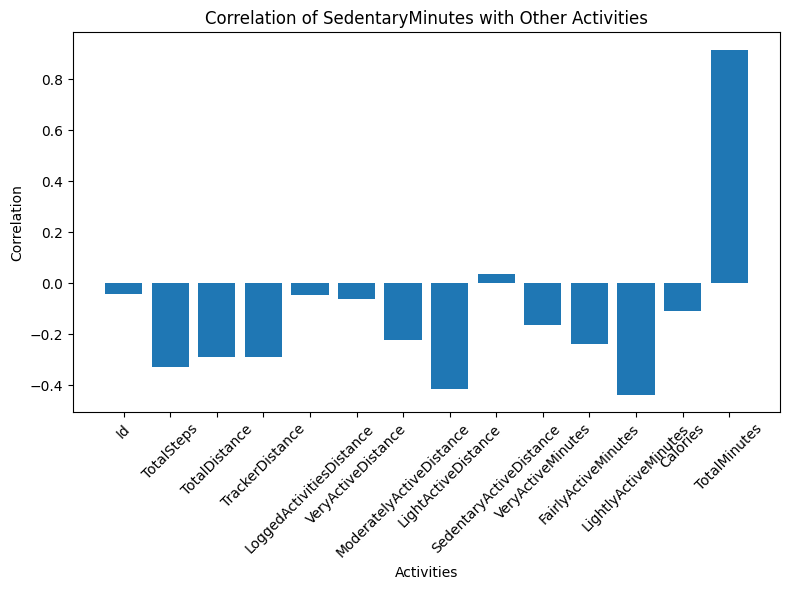

In [24]:
# Assuming your dataset is in a pandas DataFrame named 'data'
# Replace 'data.csv' with your actual dataset file or use your data loading method

# Load the da  # Replace 'data.csv' with your file

# Calculate average SedentaryMinutes
average_sedentary_minutes = data['SedentaryMinutes'].mean()
print(f"Average time spent in SedentaryMinutes: {average_sedentary_minutes} minutes")

# Calculate correlations between SedentaryMinutes and other activities
correlation_matrix = data.corr()
sedentary_corr = correlation_matrix['SedentaryMinutes'].drop('SedentaryMinutes')

# Plot correlation of SedentaryMinutes with other activities
plt.figure(figsize=(8, 6))
plt.bar(sedentary_corr.index, sedentary_corr.values)
plt.title('Correlation of SedentaryMinutes with Other Activities')
plt.xlabel('Activities')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
figure = px.scatter(data_frame = data, x='Calories', y='TotalDistance',
                   size='VeryActiveMinutes', trendline='ols', 
                   title='Relationship between Calories & TotalDistance')
figure.show()